In [1]:
import numpy as np
import pandas as pd
from patsy import dmatrices

In [2]:
sample = pd.read_csv('cars_sample.csv')

In [3]:
b, A = dmatrices('price ~ kmpl', sample)

In [4]:
A.T

array([[  1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ],
       [ 23.9,  22.7,  21.1,  20.5,  19.8,  20.4,  18.6]])

In [5]:
alpha = 1

In [6]:
w = np.linalg.inv(A.T.dot(A) + alpha * np.identity(2)).dot(A.T.dot(b))

In [7]:
w

array([[ 69.28410448],
       [ 13.33828003]])

In [8]:
from sklearn import linear_model

In [9]:
model = linear_model.Ridge(alpha = alpha, solver='sparse_cg')

In [10]:
model.fit(A,b)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sparse_cg', tol=0.001)

In [11]:
model.intercept_, model.coef_

(array([ 1597.78472025]), array([[  0.        , -58.97614314]]))

## Stack Overflow Example

In [16]:
A = np.asmatrix(np.c_[np.ones((10,1)),np.random.rand(10,3)])
A

matrix([[ 1.        ,  0.86112625,  0.07379948,  0.4841837 ],
        [ 1.        ,  0.57022554,  0.46957676,  0.45523825],
        [ 1.        ,  0.31258441,  0.96056803,  0.53008617],
        [ 1.        ,  0.9971415 ,  0.42172553,  0.65900365],
        [ 1.        ,  0.43475035,  0.56432374,  0.49589803],
        [ 1.        ,  0.83465673,  0.28714608,  0.95267334],
        [ 1.        ,  0.48739427,  0.5611719 ,  0.84945195],
        [ 1.        ,  0.67890226,  0.74399335,  0.90611506],
        [ 1.        ,  0.98813129,  0.61201237,  0.23944107],
        [ 1.        ,  0.96088537,  0.94333806,  0.51799764]])

In [17]:
b = np.asmatrix(np.random.rand(10,1))
b

matrix([[ 0.35300713],
        [ 0.04398586],
        [ 0.067771  ],
        [ 0.79757816],
        [ 0.09767994],
        [ 0.56149166],
        [ 0.08463164],
        [ 0.01429912],
        [ 0.26151765],
        [ 0.24756318]])

In [18]:
I = np.identity(A.shape[1])
I

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [19]:
alpha = 1

In [20]:
x = np.linalg.inv(A.T*A + alpha * I)*A.T*b

In [21]:
print(x.T)

[[ 0.06926044  0.27620786 -0.12684255  0.08449034]]


In [22]:
A[:,1:]

matrix([[ 0.86112625,  0.07379948,  0.4841837 ],
        [ 0.57022554,  0.46957676,  0.45523825],
        [ 0.31258441,  0.96056803,  0.53008617],
        [ 0.9971415 ,  0.42172553,  0.65900365],
        [ 0.43475035,  0.56432374,  0.49589803],
        [ 0.83465673,  0.28714608,  0.95267334],
        [ 0.48739427,  0.5611719 ,  0.84945195],
        [ 0.67890226,  0.74399335,  0.90611506],
        [ 0.98813129,  0.61201237,  0.23944107],
        [ 0.96088537,  0.94333806,  0.51799764]])

In [23]:
from sklearn.linear_model import Ridge

In [24]:
model = Ridge(alpha = alpha).fit(A[:,1:],b)

In [25]:
print(np.c_[model.intercept_, model.coef_])

[[ 0.13722463  0.23988626 -0.15524047  0.0530518 ]]


# Minimum Example

In [26]:
A = np.asmatrix(np.c_[np.ones((10,1)),np.random.rand(10,3)])
b = np.asmatrix(np.random.rand(10,1))
I = np.identity(A.shape[1])
alpha = 1
x = np.linalg.inv(A.T*A + alpha * I)*A.T*b
print(x.T)

from sklearn.linear_model import Ridge
model = Ridge(alpha = alpha).fit(A[:,1:],b)
print(np.c_[model.intercept_, model.coef_])

[[ 0.41168378  0.03447257  0.01885912 -0.08922888]]
[[ 0.67251605 -0.0961706  -0.10608818 -0.23403498]]


In [27]:
import numpy as np
A = np.asmatrix(np.random.rand(10,3))
b = np.asmatrix(np.random.rand(10,1))
I = np.identity(A.shape[1])
alpha = 10
x = np.linalg.inv(A.T*A + alpha * I)*A.T*b
print (x.T)


from sklearn.linear_model import Ridge
model = Ridge(alpha = alpha, tol=0.1, fit_intercept=False, normalize = True, solver ="cholesky").fit(A ,b)

print (model.coef_)
print (model.intercept_)

[[ 0.19224181  0.1406116   0.12169723]]
[[ 0.19224181  0.1406116   0.12169723]]
0.0


In [28]:
A = np.asmatrix(np.c_[np.ones((10,1)),np.random.rand(10,3)])
b = np.asmatrix(np.random.rand(10,1))
I = np.identity(A.shape[1])
alpha = 1
x = np.linalg.inv(A.T*A + alpha * I)*A.T*b
print(x.T)

from sklearn.linear_model import Ridge
model = Ridge(alpha = alpha, fit_intercept = False, solver = "cholesky").fit(A,b)
print(np.c_[model.intercept_, model.coef_])

[[ 0.18579158  0.14026348 -0.14583981  0.23312887]]
[[ 0.          0.18579158  0.14026348 -0.14583981  0.23312887]]


## PCA

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [30]:
%matplotlib inline

cov mat: [[ 1.66666667 -0.25      ]
 [-0.25        0.0625    ]]
SVD eigen vals: [ 1.70472479  0.02444187]
SVD eigen vec[0]: [ 0.98861022  0.15049861]
SVD eigen vec[1]: [-0.15049861  0.98861022]
PCA eigen vals: [ 0.98586494  0.01413506]
PCA eigen vec[0]: [ 0.98861022 -0.15049861]
PCA eigen vec[1]: [-0.15049861 -0.98861022]


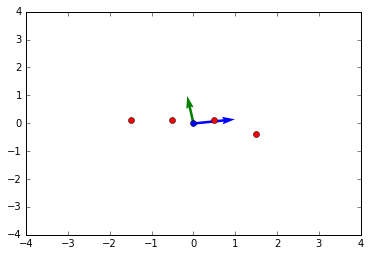

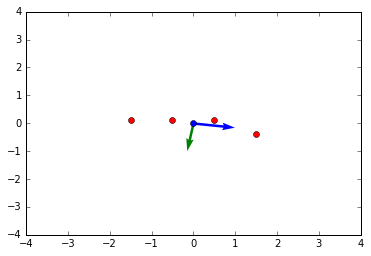

In [31]:


# X = np.array([
#   [  -2.500000000000001,   -1.873333333333334],
#   [  0.2333333333333325, 0.026666666666666394],
#   [  0.8666666666666663,   0.8266666666666662],
#   [ -1.7000000000000006,  -1.1733333333333338],
#   [  3.1000000000000005,   2.1933333333333334]
# ])

# X = np.array([ [0, 0], [1, 1], [2, 2], [3, 3] ])

X = np.array([ [0, 1], [1, 1], [2, 1], [3, 0.5] ])

# normalize by mean.
X = np.subtract(X, np.mean(X, axis=0))

cov_mat = np.cov(X.T)
print ("cov mat:", cov_mat)
svd_val, svd_vec = np.linalg.eig(cov_mat)

print ("SVD eigen vals:", svd_val)
print ("SVD eigen vec[0]:", svd_vec[0])
print ("SVD eigen vec[1]:", svd_vec[1])


pca = PCA(n_components=2)
pca.fit(X)

# print "explained variance "
# print pca.explained_variance_ratio_

# PCA eigen vectors
pca_vec = pca.components_

print ("PCA eigen vals:", pca.explained_variance_ratio_)
print ("PCA eigen vec[0]:", pca_vec[0])
print ("PCA eigen vec[1]:", pca_vec[1])


def plot(eig_vec):
  plt.plot(X[:,0], X[:,1], 'ro')
  plt.plot([0], [0], 'bo')

  plt.quiver(eig_vec[0, 0], eig_vec[0, 1], angles='xy', scale_units='xy', scale=1, color='blue')
  plt.quiver(eig_vec[1, 0], eig_vec[1, 1], angles='xy', scale_units='xy', scale=1, color='green')

  plt.xlim([-4,4])
  plt.ylim([-4,4])

  plt.aspect = 'equal'

fig = plt.figure(1)
plot(svd_vec)
fig = plt.figure(2)
plot(pca_vec)
plt.show()